# 인천공항 이용자수 분석 및 예측

- https://kosis.kr/search/search.do
- 출입국 항구/내외국인/성별 국제이동(연간)

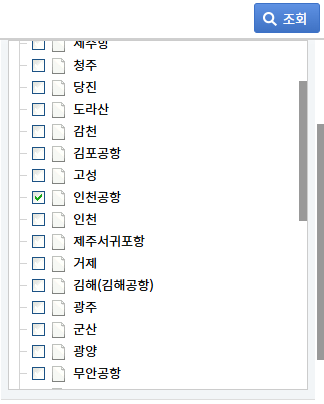

In [2]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [4]:
# csv 파일 임포트
file_path = "./ref/출입국항구내외국인성별국제이동연간__20250305.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [5]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [6]:
filter1 = ex1_data['type1'] == '외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [7]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [8]:
filter2 = ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2] 
filter3 = ex2_data['type2']=='출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name='total')
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name='total')

In [9]:
ex3_data

,year,total
0,2001,72896
1,2002,97493
2,2003,134088
3,2004,123698
4,2005,229675
5,2006,145644
6,2007,127230
7,2008,174604
8,2009,201288
9,2010,163777


In [10]:
# ax1 = ex2_data.plot(title="2021~2023년 인천공항 입국 외국인 차트")
# ax1.set_xticks(range(len(ex2_data)))
# ax1.set_xticklabels(ex2_data['year'],rotation=45)
# plt.show()

# ax2 = ex3_data.plot(title="2021~2023년 인천공항 출국 외국인 차트")
# ax2.set_xticks(range(len(ex3_data)))
# ax2.set_xticklabels(ex3_data['year'],rotation=45)
# plt.show()

In [11]:
# !pip install prophet
# !pip install --upgrade plotly
# !pip install tqdm
# ! pip install --upgrade jupyter ipywidgets

In [12]:
from prophet import Prophet
# from .autonotebook import tqdm as notebook_tqdm

In [13]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다. 
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'],format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [14]:
m = Prophet()
m.fit(ex4_data)

17:18:11 - cmdstanpy - INFO - Chain [1] start processing
17:18:11 - cmdstanpy - INFO - Chain [1] done processing


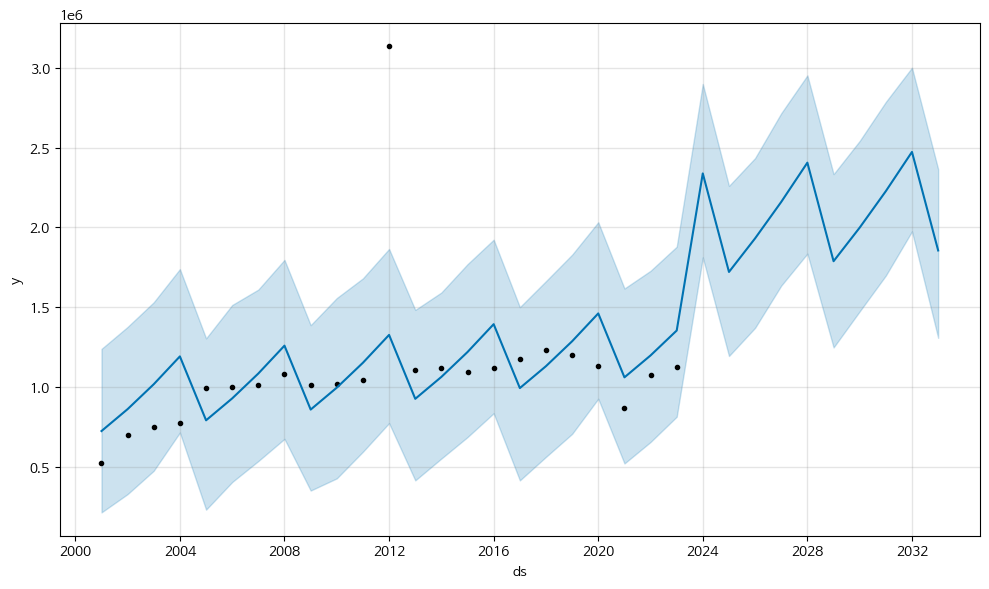

<Figure size 1000x1500 with 0 Axes>

In [15]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()

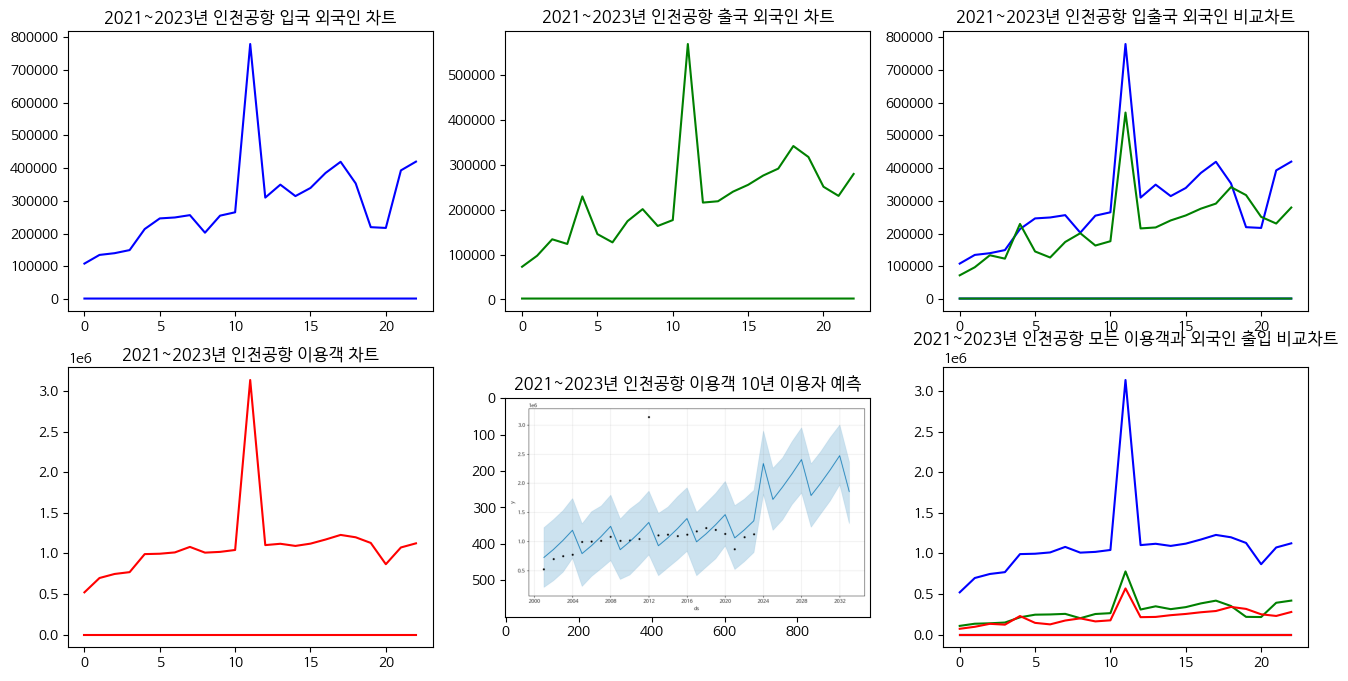

In [16]:
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./chart/예측.png")

fig, axs = plt.subplots(2,3,figsize=(16,8))

axs[0,0].plot(ex2_data,color="blue")
axs[0,1].plot(ex3_data,color="green")
axs[0,2].plot(ex2_data,color="blue")
axs[0,2].plot(ex3_data,color="green")
axs[1,0].plot(ex1_data,color="red")
axs[1,2].plot(ex1_data,color="blue")
axs[1,2].plot(ex2_data,color="green")
axs[1,2].plot(ex3_data,color="red")
axs[0,0].set_title("2021~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든 이용객과 외국인 출입 비교차트")


axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.show()

In [7]:
filter4 = ex1_data['type1'] == '내국인'
ex5_data = ex1_data[filter4].copy()
ex5_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
87,인천공항,내국인,여자,2021,출국자,98314
88,인천공항,내국인,여자,2022,입국자,86959
89,인천공항,내국인,여자,2022,출국자,130722
90,인천공항,내국인,여자,2023,입국자,95233


In [8]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [9]:
filter5 = ex5_data['type2']=='입국자'
ex6_filtered = ex5_data[filter5] 
filter6 = ex5_data['type2']=='출국자'
ex7_filtered = ex5_data[filter6]
ex6_data = ex6_filtered.groupby('year')['value'].sum().reset_index(name='total')
ex7_data = ex7_filtered.groupby('year')['value'].sum().reset_index(name='total')

In [10]:
ex7_data

,year,total
0,2001,199666
1,2002,261127
2,2003,263889
3,2004,281446
4,2005,310387
5,2006,338594
6,2007,350481
7,2008,342455
8,2009,293860
9,2010,306473


In [11]:
filter7 = ex5_data['gender']=='남자'
ex8_filtered = ex5_data[filter7] 
filter8 = ex5_data['gender']=='여자'
ex9_filtered = ex5_data[filter8]
ex8_data = ex8_filtered.groupby('year')['value'].sum().reset_index(name='total')
ex9_data = ex9_filtered.groupby('year')['value'].sum().reset_index(name='total')

In [12]:
ex7_data

,year,total
0,2001,199666
1,2002,261127
2,2003,263889
3,2004,281446
4,2005,310387
5,2006,338594
6,2007,350481
7,2008,342455
8,2009,293860
9,2010,306473


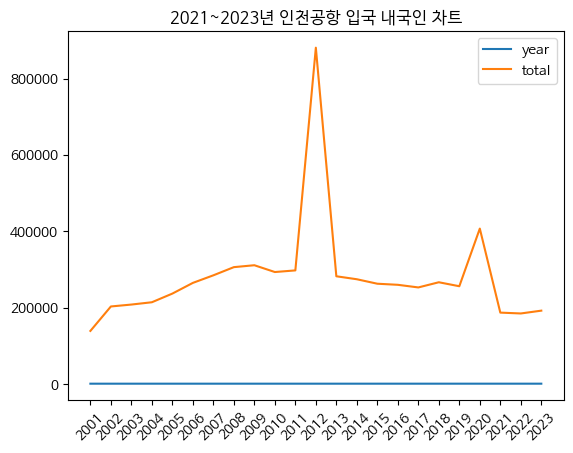

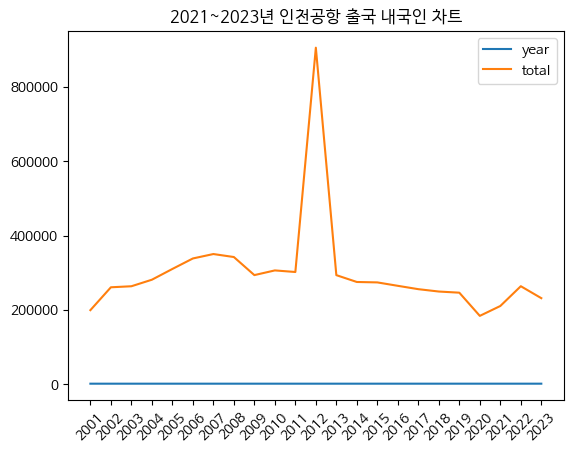

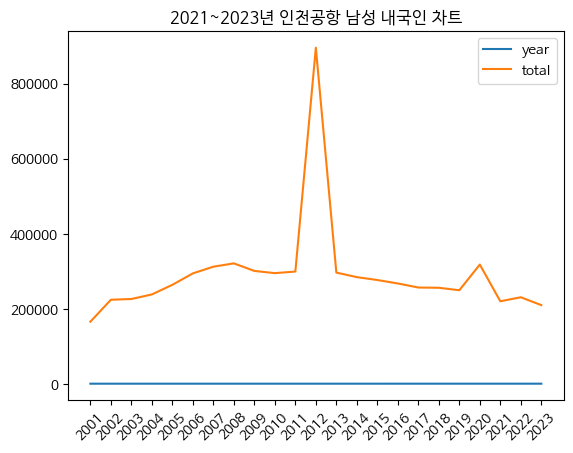

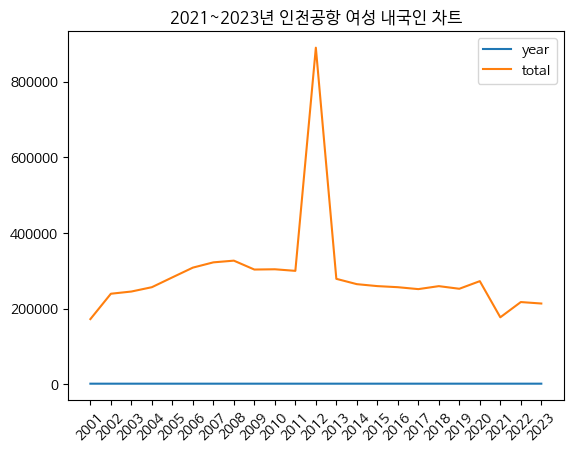

In [13]:
ax3 = ex6_data.plot(title="2021~2023년 인천공항 입국 내국인 차트")
ax3.set_xticks(range(len(ex6_data)))
ax3.set_xticklabels(ex6_data['year'],rotation=45)


ax4 = ex7_data.plot(title="2021~2023년 인천공항 출국 내국인 차트")
ax4.set_xticks(range(len(ex7_data)))
ax4.set_xticklabels(ex7_data['year'],rotation=45)


ax5 = ex8_data.plot(title="2021~2023년 인천공항 남성 내국인 차트")
ax5.set_xticks(range(len(ex8_data)))
ax5.set_xticklabels(ex8_data['year'],rotation=45)


ax6 = ex9_data.plot(title="2021~2023년 인천공항 여성 내국인 차트")
ax6.set_xticks(range(len(ex9_data)))
ax6.set_xticklabels(ex9_data['year'],rotation=45)

plt.show()

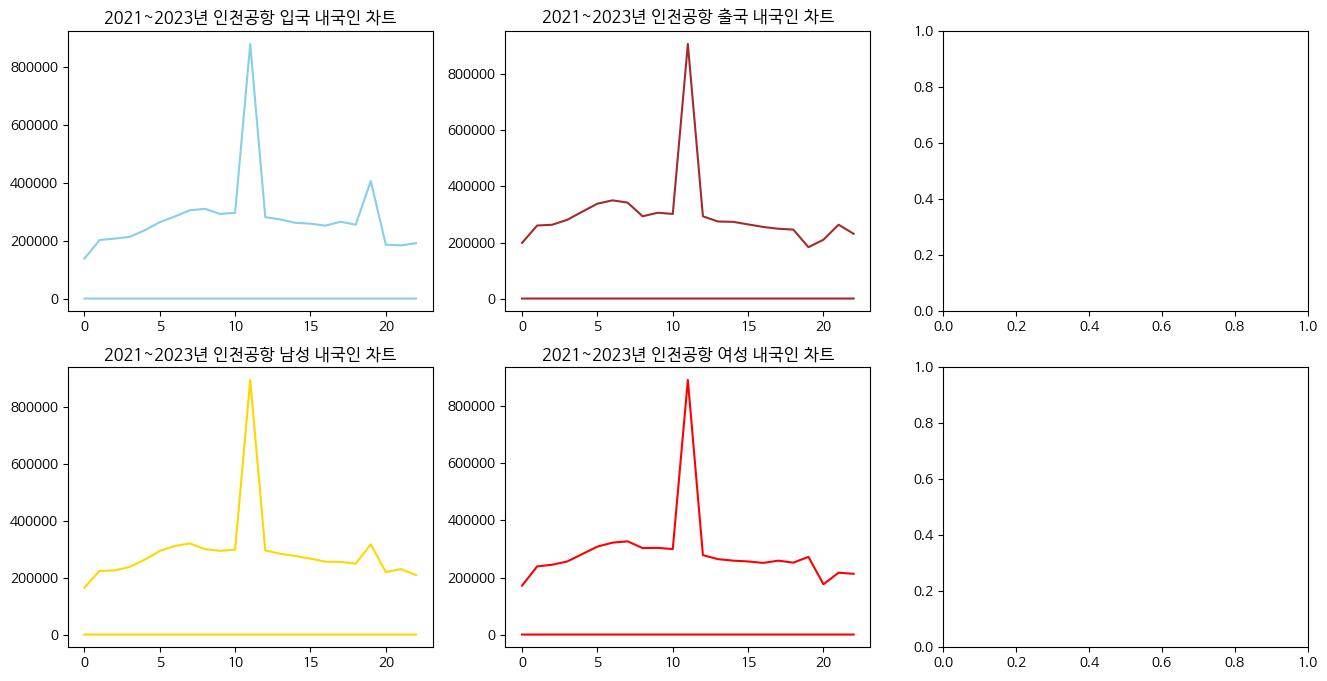

In [18]:
fig, axs = plt.subplots(2,3,figsize=(16,8))

axs[0,0].plot(ex6_data,color="skyblue")
axs[0,1].plot(ex7_data,color="brown")
axs[1,0].plot(ex8_data,color="gold")
axs[1,1].plot(ex9_data,color="red")
axs[0,0].set_title("2021~2023년 인천공항 입국 내국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 내국인 차트")
axs[1,0].set_title("2021~2023년 인천공항 남성 내국인 차트")
axs[1,1].set_title("2021~2023년 인천공항 여성 내국인 차트")


plt.show()

## 증가와 감소, 전망
- 인천공항 내국인 입출국 이용객 수는 2012년에 가장 높았으나, 2021년에는 코로나19로 인해 출국 이용객 수가 줄어들었습니다.
- 외국인 이용객 수와 내국인 이용객 수가 2012년에 가장 높아진 이유는 2012년에 인천공항에서 인천공항 스카이페스티벌이 있었기 때문입니다. 이 행사는 인천국제공항공사와 인천시가 주최하는 행사로, K-POP과 클래식, 오페라까지 즐길 수 있는 야외콘서트를 하기 때문에 내국인뿐만 아니라 외국인도 같이 즐길 수 있는 행사이기 때문에 이용객 수가 증가한 것으로 보입니다.
- 2021년 코로나 19로 인해서 출국 이용객 수가 줄었지만, 그 이후로 코로나19가 안정화가 되자 다시 이용객 수가 증가하는 모습을 보이고 있습니다.